In [1]:
from astropy.io import fits
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [18]:
daaro_filename = "/Users/dijkema/Documents/perseids-aartfaac/daaro/2020-08-12T215753.jpg"

In [19]:
plaatje = plt.imread(daaro_filename).mean(axis=2)
plaatje = plaatje / np.max(plaatje) * 255
plaatje = plaatje.astype(np.uint8)
#plaatje = plaatje[::-1,::-1] # Rotate 180˚

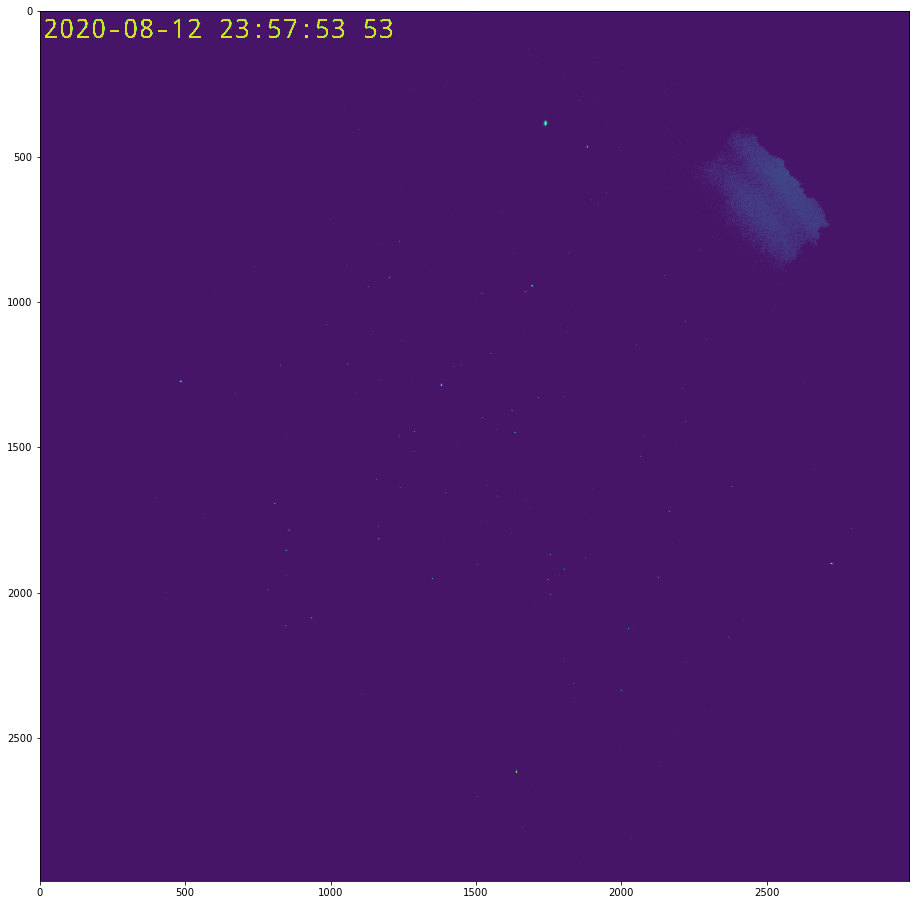

In [20]:
fig, ax = plt.subplots(figsize=(16,16))
ax.imshow(plaatje);

In [21]:
f = fits.open("RU0001/FF_RU0001_20190427_210639_501_0363008.fits")

In [22]:
hduplaatje = fits.ImageHDU(plaatje)
hduleeg = fits.PrimaryHDU()

In [27]:
hdul = fits.HDUList([hduleeg, hduplaatje, hduplaatje, hduplaatje, hduplaatje])

In [28]:
f[0].header['FIRST']

363264

In [29]:
for hdu in hdul[1:]:
    hdu.header['XTENSION'] = 'IMAGE'
    hdu.header['PCOUNT'] = 0
    hdu.header['GCOUNT'] = 1

In [30]:
hdul[1].header['EXTNAME'] = 'MAXPIXEL'
hdul[2].header['EXTNAME'] = 'MAXFRAME'
hdul[3].header['EXTNAME'] = 'AVEPIXEL'
hdul[4].header['EXTNAME'] = 'STDPIXEL'

In [31]:
hdul[0].header['NROWS'] = hdul[1].header['NAXIS2']
hdul[0].header['NCOLS'] = hdul[1].header['NAXIS1']
hdul[0].header['NBITS'] = hdul[0].header['BITPIX']
hdul[0].header['NFRAMES'] = 256
hdul[0].header['CAMNO'] = 'RU0001'
hdul[0].header['FPS'] = 25.0
hdul[0].header['FIRST'] = f[0].header['FIRST']

In [33]:
daaro_filename

'/Users/dijkema/Documents/perseids-aartfaac/daaro/2020-08-12T215753.jpg'

In [47]:
from datetime import datetime

In [58]:
obsdate = datetime.strptime(daaro_filename[-21:-4], '%Y-%m-%dT%H%M%S')

In [67]:
ff_filename = f'daaro/FF_NL0042_{obsdate:%Y%m%d_%H%M%S}_000_0000512.fits'

In [68]:
hdul.writeto(ff_filename)

In [70]:
hdul.close()